<h1>Studying products sold on the internet


This dataset contains product listings as well as product ratings and sales performance. In this notebook, I tried to apply machine learning and data analysis in an attempt to look for some correlations between the attributes after dealing with missing data and cleaning the data.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
filepath = "summer-products-with-rating-and-performance_2020-08.csv"
df = pd.read_csv(filepath)
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


<h2>Data Exploration</h2><br>
To explore this data, we need to deal first
with missing data and unnecessarily data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

<h2>Size Variation</h2>


In [39]:
pr_var = df['product_variation_size_id'].value_counts()
pr_var[pr_var > 1]

S               641
XS              356
M               200
XXS             100
L                49
S.               18
XL               17
XXL              15
XXXS              6
s                 5
4XL               5
XS.               5
Size S            5
Size-XS           4
2XL               4
M.                4
SIZE XS           4
10 ml             3
Size-S            3
33                3
34                3
SizeL             3
2pcs              3
S Pink            2
5XL               2
size S            2
29                2
Size4XL           2
1                 2
SIZE-XXS          2
One Size          2
XXXXXL            2
25                2
S(bust 88cm)      2
1 pc.             2
Size -XXS         2
EU 35             2
XXXXL             2
35                2
Size M            2
3XL               2
Size S.           2
Suit-S            2
Name: product_variation_size_id, dtype: int64

At first, we want to see which size is most
common. We then realize that there is more
than one name for the same size. We start
dealing with this issue by uniting these
terms into one. Next, we categorize every
Nan to an ‘other’ category.

In [40]:
df['product_variation_size_id'] = df['product_variation_size_id'].replace('S.', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('XS.', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('M.', 'M')

df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-XS', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SIZE XS', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size4XL', 'XL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('size S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size M', 'M')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size -XXS', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SIZE-XXS', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size S.', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('s', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SizeL', 'L')

df['product_variation_size_id'] = df['product_variation_size_id'].replace('5XL', 'XL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('4XL', 'XL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('3XL', 'XL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('2XL', 'XL')



In [46]:
pr_var = df['product_variation_size_id'].value_counts()
pr_var[pr_var > 1]

S         693
XS        356
M         206
OTHER     109
XXS       100
L          52
XL         32
XXL        15
XXXS        6
XXXXL       2
XXXXXL      2
Name: product_variation_size_id, dtype: int64

In [47]:
def pr_var(name):
    if name == 'XXXS' \
    or name == 'XXS' \
    or name == 'XS' \
    or name == 'S' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == 'XXL' \
    or name == 'XXXXL' \
    or name == 'XXXXXL':
        return name
    else:
        return "OTHER"
    
df['product_variation_size_id'] = df['product_variation_size_id'].replace(np.nan, 'OTHER')
df['product_variation_size_id'] = df['product_variation_size_id'].apply(pr_var)

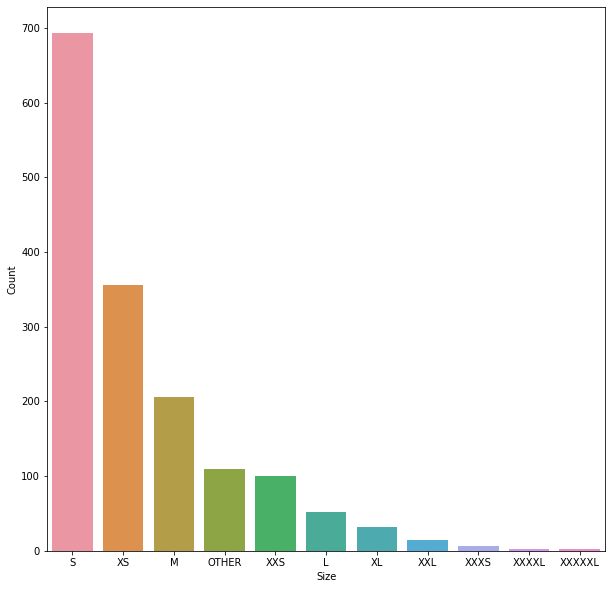

In [48]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_variation_size_id',
              order = df['product_variation_size_id'].value_counts().index,
              data = df,
              ax = ax)
ax.set(xlabel='Size', ylabel='Count')
plt.show()

<h2>Product Colors</h2><br>
We repeat the same steps to see the most common color.

In [50]:
pr_colr = df['product_color'].value_counts()
pr_colr[pr_colr > 2]

black               302
white               254
yellow              105
blue                 99
pink                 99
red                  93
green                90
grey                 71
purple               53
armygreen            31
navyblue             28
winered              28
orange               27
multicolor           20
beige                14
khaki                12
lightblue            12
gray                 11
white & green        10
rosered               8
skyblue               8
brown                 7
coffee                7
darkblue              6
floral                5
rose                  5
black & green         4
navy                  4
fluorescentgreen      4
leopard               4
lightpink             4
black & white         3
lightgreen            3
camouflage            3
White                 3
Black                 3
orange-red            3
Name: product_color, dtype: int64

In [51]:
df['product_color'] = df['product_color'].replace('Black', 'black')
df['product_color'] = df['product_color'].replace('White', 'white')

df['product_color'] = df['product_color'].replace('navyblue', 'blue')
df['product_color'] = df['product_color'].replace('lightblue', 'blue')
df['product_color'] = df['product_color'].replace('skyblue', 'blue')
df['product_color'] = df['product_color'].replace('darkblue', 'blue')
df['product_color'] = df['product_color'].replace('navy', 'blue')

df['product_color'] = df['product_color'].replace('winered', 'red')
df['product_color'] = df['product_color'].replace('rosered', 'red')
df['product_color'] = df['product_color'].replace('rose', 'red')
df['product_color'] = df['product_color'].replace('orange-red', 'red')

df['product_color'] = df['product_color'].replace('lightpink', 'pink')

df['product_color'] = df['product_color'].replace('armygreen', 'green')
df['product_color'] = df['product_color'].replace('khaki', 'green')
df['product_color'] = df['product_color'].replace('lightgreen', 'green')
df['product_color'] = df['product_color'].replace('fluorescentgreen', 'green')

df['product_color'] = df['product_color'].replace('gray', 'grey')

df['product_color'] = df['product_color'].replace('coffee', 'brown')

df['product_color'] = df['product_color'].replace('multicolor', 'other')
df['product_color'] = df['product_color'].replace('floral', 'other')
df['product_color'] = df['product_color'].replace('leopard', 'other')
df['product_color'] = df['product_color'].replace('camouflage', 'other')

df['product_color'] = df['product_color'].replace('white & green', 'dual')
df['product_color'] = df['product_color'].replace('black & green', 'dual')
df['product_color'] = df['product_color'].replace('black & white', 'dual')
df['product_color'] = df['product_color'].replace('camouflage', 'other')
    
df['product_color'] = df['product_color'].replace(np.nan, 'other')

pr_colr = df['product_color'].value_counts()
pr_colr[pr_colr > 2]


black     305
white     257
blue      157
green     140
red       137
yellow    105
pink      103
grey       82
other      73
purple     53
orange     27
dual       17
beige      14
brown      14
Name: product_color, dtype: int64

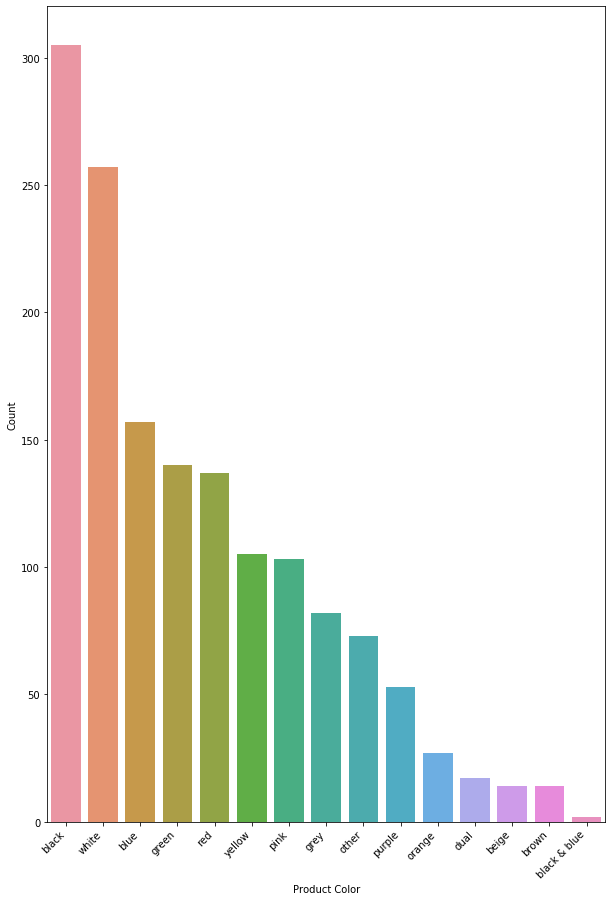

In [53]:
# Show Most popular colors
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_color',
              data = df,
              order = df['product_color'].value_counts().iloc[:15].index,
              ax = ax)
ax.set(xlabel='Product Color', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<h2>price vs. retail_price</h2>


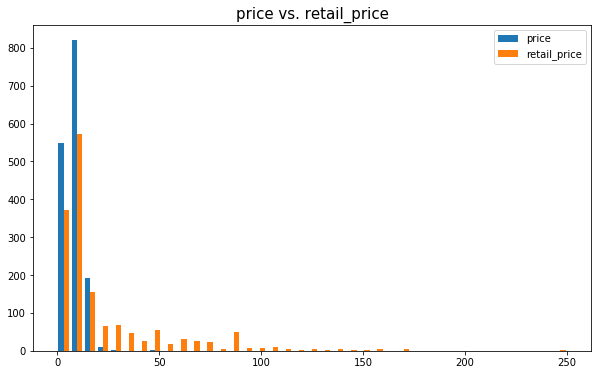

In [11]:
def plot_hist_together(df,label1, label2, bins):
    plt.figure(figsize=(10,6))
    plt.hist([df[label1], df[label2]], bins, label=[label1, label2])
    title = label1 + ' vs. ' + label2
    plt.title(title, fontsize=15)
    plt.legend()
    plt.show()

bins = np.linspace(0, 250, 40)
plot_hist_together(df, 'price', 'retail_price', bins)

<h2>origin_country distribution


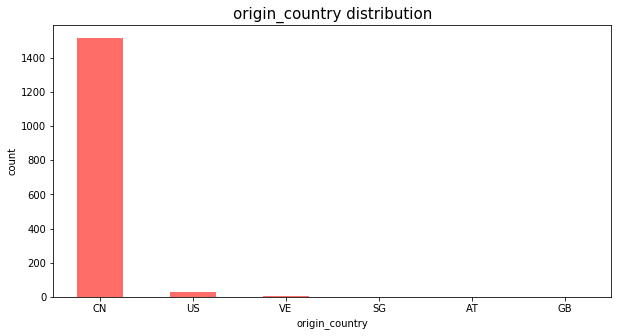

In [12]:
def count_plot(df, label, color, figsize=(10,5), rotation=0):
    plt.figure(figsize=figsize)
    df[label].value_counts().plot(kind='bar', color=color)
    plt.xlabel(label)
    plt.ylabel('count')
    
    title = label + ' distribution'
    plt.title(title, fontsize=15)
    plt.xticks(rotation=rotation)
    plt.show()    

count_plot(df, 'origin_country', '#ff6d69')

<h2>rating distribution


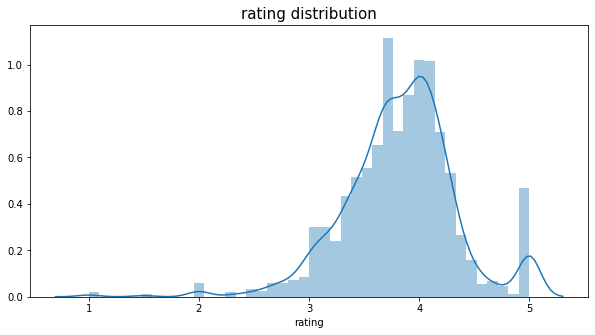

In [38]:
plt.figure(figsize=(10,5))
sns.distplot(df['rating'])
plt.title('rating distribution', fontsize=15)
plt.show()

<h2>Relationship between retail_price and rating</h2><br>
We wanted to test our hypothesis that as the
retail price is higher, the rating will be higher too.
To test this, we made a scatter plot with a
regression fit line in it.


[Text(0, 0.5, 'rating'),
 Text(0.5, 0, 'retail_price'),
 Text(0.5, 1.0, 'Relationship between retail_price and rating')]

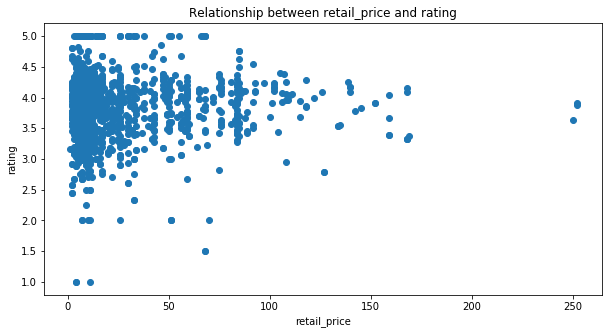

In [23]:
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.scatter(df.retail_price, df.rating)
ax.set(xlabel='retail_price',
       ylabel='rating',
       title='Relationship between retail_price and rating')

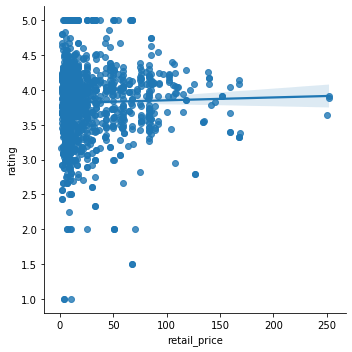

In [35]:
sns.lmplot(x="retail_price", y="rating", data=df);


In [33]:
df1 = pd.DataFrame(df,columns=['retail_price','rating'])
df1.corr()

,retail_price,rating
retail_price,1.000000,0.024106
rating,0.024106,1.000000


 We ended up with
surprisingly very low correlation of 0.024 showing no
relation between the price and rating and
thereby our hypothesis is rejected.

<h2>Correlation Heat Map</h2><br>
Lastly, we mad a correlation heatmap to see
every relation between the attributes and
furthermore to gain insight on what really
impacts the units sold.

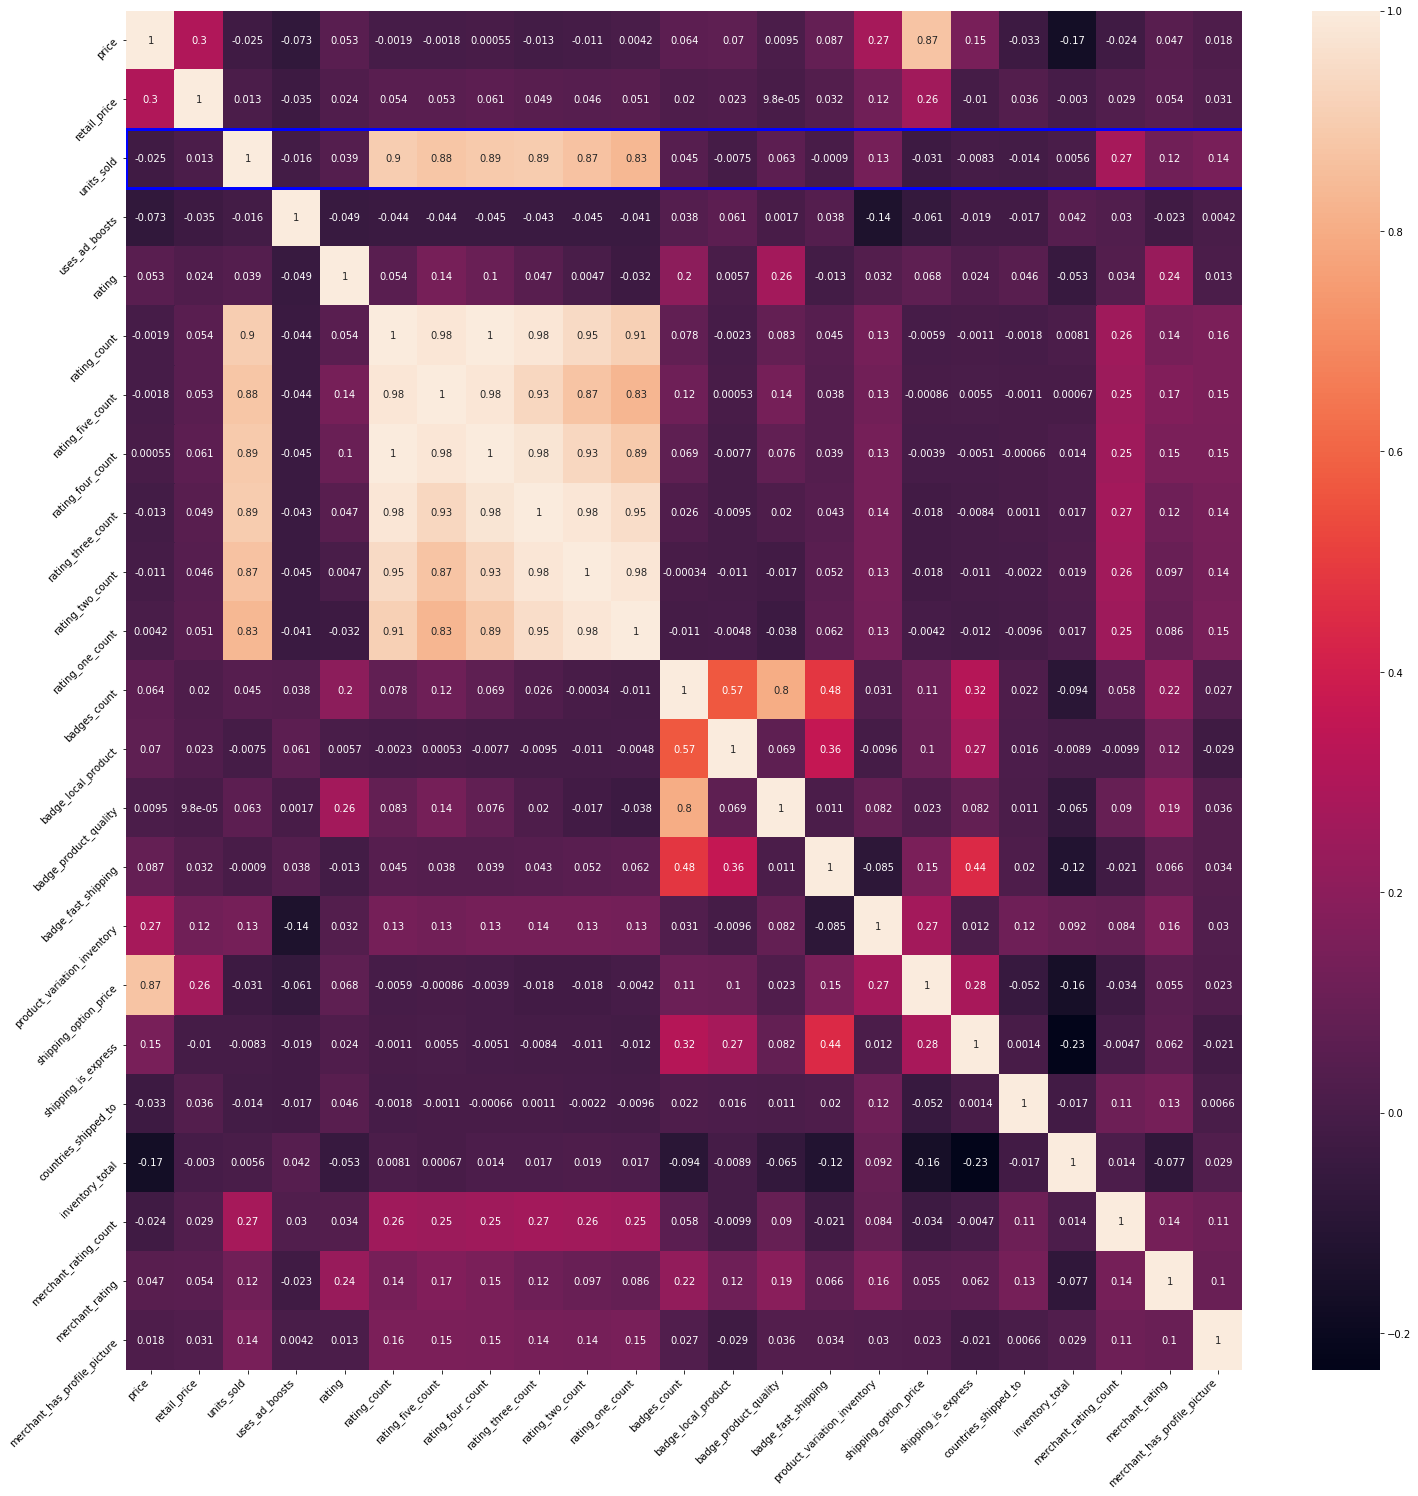

In [59]:
fig_dims = (25, 25)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(),
            annot=True,
            ax=ax)
ax.add_patch(plt.Rectangle((0,2),31,1, 
                           fill = False, 
                           edgecolor = 'blue', 
                           lw = 3))
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

<ul><h3>Major Factors which increases the 'units_sold':</h3><br>
    <li>Rating Count</li>
    <li>Rating
    <li>Rating Five Count</li>
    <li>Rating Four Count</li>
    <li>Rating Three Count</li>
    <li>Merchant Rating Count</li>
    <li>Merchant Rating</li>
    <li>Merchant Has Profile Picture</li>
    <li>Is Title Localised</li>
    <li>Rating
    <li>Badge Product Quality</li>
    <li>Badges Count</li>
    <li>Product Variation Inventory</li>
    <li>Number of Tags</li>
    <li>Title Localised</li>
    <li>Number Of Tags</li>
    <li>Have Rating on Merchant Subtitle</li>
    <li>High Retail Price</li>
    <li>High Buyer Price</li>
</ul>
<br>

<ul><h3>Major Factors which decreases the 'units_sold':</h3><br>
    <li>Rating Two Count</li>
    <li>Rating One Count</li>
    <li>Price Increment</li>
    <li>Shipping Price Increment</li>
    <li>If Merchant title and Merchant name has differnt names</li>
    <li>No Urgency Banner</li>
    <li>High Price (Buyer Price)</li>
    <li>Lower discount rate (Buyer price compare to retail price)</li>
</ul>
<br>
    
    
<ul><h3>Special Note :-</h3><br>
    <li>Add Boost does not have any significant change to the 'units_sold'</li>
</ul>